In [29]:
import numpy
import scipy.odr
import scipy.optimize
import matplotlib.pyplot as plt

ODR fit:
	a = 0.709970	b = 0.164254
Curve fit:
	a = 0.671502	b = 0.183488


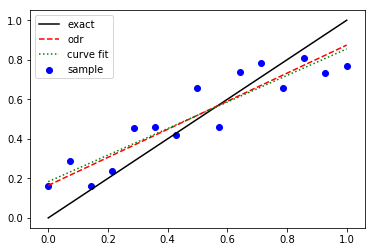

In [37]:
def f_odr(p, x):
    a, b = p
    return a*x + b
linear = scipy.odr.Model(f_odr)

size = 15
deviation = 0.5
x = numpy.linspace(0,1,size)
y = x + deviation*(numpy.random.rand(*x.shape)-0.5)
dataToFit = scipy.odr.Data(x,y)

odr = scipy.odr.ODR(dataToFit, linear, beta0=[1,0])
odrOut = odr.run()
print('ODR fit:\n\ta = {:f}\tb = {:f}'.format(*odrOut.beta))

def f_opt(x, a, b):
    return a*x + b
(a,b), _ = scipy.optimize.curve_fit(f_opt, x, y)
print('Curve fit:\n\ta = {:f}\tb = {:f}'.format(a,b))

plt.plot(x, x, 'k-', label='exact')
plt.scatter(x, y, marker='o', color='b', label='sample')
plt.plot(x, f_odr(odrOut.beta, x), 'r--', label='odr')
plt.plot(x, f_opt(x,a,b), 'g:', label='curve fit')
plt.legend(loc='best')
plt.show()

Analytical:
	a = 0.350000	b = -0.830000	c = 2.770000
ODR fit:
	a = 0.451247	b = -0.971976	c = 2.798239
Curve fit:
	a = 0.328555	b = -0.823944	c = 2.766885


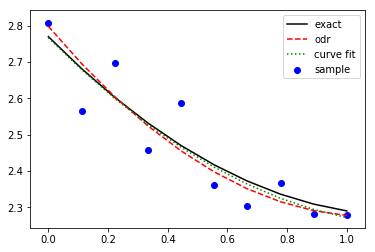

In [46]:
A, B, C = 0.35, -0.83, 2.77
def quad(x):
    return A*x**2 + B*x + C
print('Analytical:\n\ta = {:f}\tb = {:f}\tc = {:f}'.format(A, B, C))

size = 10
deviation = 0.5
x = numpy.linspace(0, 1, size)
y = quad(x + deviation*(numpy.random.rand(*x.shape)-0.5))

def f_odr(p, x):
    a, b, c = p
    return a*x**2 + b*x + c
quadratic = scipy.odr.Model(f_odr)
dataToFit = scipy.odr.Data(x,y)
odr = scipy.odr.ODR(dataToFit, quadratic, beta0=[1,1,1])
odrOut = odr.run()
print('ODR fit:\n\ta = {:f}\tb = {:f}\tc = {:f}'.format(*odrOut.beta))

def f_opt(x, a, b, c):
    return a*x**2 + b*x + c
(a,b,c), _ = scipy.optimize.curve_fit(f_opt, x, y)
print('Curve fit:\n\ta = {:f}\tb = {:f}\tc = {:f}'.format(a,b,c))

plt.plot(x, quad(x), 'k-', label='exact')
plt.scatter(x, y, marker='o', color='b', label='sample')
plt.plot(x, f_odr(odrOut.beta, x), 'r--', label='odr')
plt.plot(x, f_opt(x,a,b,c), 'g:', label='curve fit')
plt.legend(loc='best')
plt.show()